In [5]:
import math
import pandas as pd

import arrow

import ipynb 
import os.path
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from dotenv import load_dotenv
from networkx.algorithms import bipartite
from importlib import reload

load_dotenv(verbose=True)

True

In [7]:
query = {
    "field_ids": [
        "name",
        "short_description",
        "location_identifiers",
        "categories",
        "category_groups",
        "facet_ids",
        "twitter",
        "rank_org"
        
    ],
    "limit": 1000,
    "query": [
        {
          "type": "predicate",
          "field_id": "location_identifiers",
          "operator_id": "includes",
          "values": ["Switzerland"]
        },
    ]
}

df = df_from_api_CB (query, "organizations")

Organization download

query_swiss = {
    "field_ids": [
        "name",
        #"created_at",
        "short_description",
        "location_identifiers",
        #"funding_stage",
        #"funding_total",
        "categories",
        "category_groups",
        "facet_ids",
        "twitter",
        "rank_org"
        
    ],
    "limit": 1000,
    "query": [
        {
          "type": "predicate",
          "field_id": "location_identifiers",
          "operator_id": "includes",
          "values": ["Switzerland"]
        },
    ]
}

## Data Cleaning

In [20]:
to_drop = [
    'properties.identifier.image_id',
    'properties.identifier.uuid',
    'properties.identifier.entity_def_id',   
    'properties.short_description',
    'properties.identifier.permalink',
    'properties.short_description',
    'properties.twitter.value'
]

to_rename = {
    'properties.name': 'name', 
    'properties.category_groups':'category_groups'
}

to_check_double = {
    'name': 'properties.identifier.value'
    
}

sort_by = "properties.rank_org"

df = CB_data_cleaning(df, to_drop, to_rename, to_check_double, sort_by)

In [14]:
df.head()

,uuid,name,properties.facet_ids,properties.identifier.permalink,category_groups,properties.short_description,properties.rank_org,properties.categories,properties.location_identifiers,properties.twitter.value
0,bd5e4fce-84e9-488e-b21a-8003ee09c03c,Polkadot,"[rank, company]",polkadot,"[{'entity_def_id': 'category_group', 'permalin...",Polkadot is a heterogeneous multi‑chain techno...,167,"[{'entity_def_id': 'category', 'permalink': 'a...","[{'permalink': 'zug-zug', 'uuid': '2374ed28-a8...",https://twitter.com/polkadotnetwork
1,70e9297e-c40a-5679-edcf-5287d6577ca2,Novartis,"[investor, company, rank]",novartis,"[{'entity_def_id': 'category_group', 'permalin...",Novartis is a healthcare company that provides...,176,"[{'entity_def_id': 'category', 'permalink': 'b...","[{'permalink': 'basel-basel-stadt', 'uuid': '6...",http://twitter.com/novartis
2,96a3355d-8f90-48ab-7354-36335f71adce,Partners Group,"[investor, company, rank]",partners-group,"[{'entity_def_id': 'category_group', 'permalin...","Partners Group are a unique, global alternativ...",265,"[{'entity_def_id': 'category', 'permalink': 'f...","[{'permalink': 'baar-zug', 'uuid': '161b7401-4...",https://twitter.com/partnersgroup
3,393a50c8-102c-5fb0-0c75-f88756e297d8,Roche,"[investor, company, rank]",roche,"[{'entity_def_id': 'category_group', 'permalin...",Roche is a pharmaceutical and diagnostics comp...,304,"[{'entity_def_id': 'category', 'permalink': 'b...","[{'permalink': 'basel-basel-stadt', 'uuid': '6...",http://twitter.com/Roche
4,d17e4f27-d1aa-821e-dd0b-1a456dd678e6,ConsenSys,"[investor, company, rank]",consensus-systems,"[{'entity_def_id': 'category_group', 'permalin...","ConsenSys develops enterprise applications, in...",309,"[{'entity_def_id': 'category', 'permalink': 'c...","[{'permalink': 'zug-zug', 'uuid': '2374ed28-a8...",https://twitter.com/consensys


In [11]:
# import functions from py file 

import function
reload(function)
from function import CB_data_cleaning, df_from_api_CB, extract_nodes
from function import nx_dip_graph_from_pandas, plot_bipartite_graph, filter_dict

In [17]:
df.columns

Index(['uuid', 'name', 'properties.facet_ids',
       'properties.identifier.permalink', 'category_groups',
       'properties.short_description', 'properties.rank_org',
       'properties.categories', 'properties.location_identifiers',
       'properties.twitter.value'],
      dtype='object')

#### Extract categories:

In [18]:
category_groups = df["category_groups"].values
i = 0

for line in category_groups:
    
    if issubclass(type(line), float) == False:
        df["category_groups"].values[i] = [ x.get('value') for x in line]
    
    i = i+1

In [23]:
df.head()

,uuid,name,properties.facet_ids,properties.identifier.permalink,category_groups,properties.short_description,properties.rank_org,properties.categories,properties.location_identifiers,properties.twitter.value
0,bd5e4fce-84e9-488e-b21a-8003ee09c03c,Polkadot,"[rank, company]",polkadot,"[Apps, Financial Services, Information Technol...",Polkadot is a heterogeneous multi‑chain techno...,167,"[{'entity_def_id': 'category', 'permalink': 'a...","[{'permalink': 'zug-zug', 'uuid': '2374ed28-a8...",https://twitter.com/polkadotnetwork
1,70e9297e-c40a-5679-edcf-5287d6577ca2,Novartis,"[investor, company, rank]",novartis,"[Biotechnology, Health Care, Science and Engin...",Novartis is a healthcare company that provides...,176,"[{'entity_def_id': 'category', 'permalink': 'b...","[{'permalink': 'basel-basel-stadt', 'uuid': '6...",http://twitter.com/novartis
2,96a3355d-8f90-48ab-7354-36335f71adce,Partners Group,"[investor, company, rank]",partners-group,"[Financial Services, Lending and Investments]","Partners Group are a unique, global alternativ...",265,"[{'entity_def_id': 'category', 'permalink': 'f...","[{'permalink': 'baar-zug', 'uuid': '161b7401-4...",https://twitter.com/partnersgroup
3,393a50c8-102c-5fb0-0c75-f88756e297d8,Roche,"[investor, company, rank]",roche,"[Biotechnology, Health Care, Science and Engin...",Roche is a pharmaceutical and diagnostics comp...,304,"[{'entity_def_id': 'category', 'permalink': 'b...","[{'permalink': 'basel-basel-stadt', 'uuid': '6...",http://twitter.com/Roche
4,d17e4f27-d1aa-821e-dd0b-1a456dd678e6,ConsenSys,"[investor, company, rank]",consensus-systems,"[Financial Services, Mobile, Payments, Software]","ConsenSys develops enterprise applications, in...",309,"[{'entity_def_id': 'category', 'permalink': 'c...","[{'permalink': 'zug-zug', 'uuid': '2374ed28-a8...",https://twitter.com/consensys


### Graph

In [10]:
df_graph = df[['name', 'category_groups']]
df_graph = df_graph.set_index("name")
df_graph.head()

,category_groups
name,
Polkadot,"[Apps, Financial Services, Information Technol..."
Novartis,"[Biotechnology, Health Care, Science and Engin..."
ConsenSys,"[Financial Services, Mobile, Payments, Software]"
Partners Group,"[Financial Services, Lending and Investments]"
Roche,"[Biotechnology, Health Care, Science and Engin..."


In [11]:
# create the bipartite network

B = nx_dip_graph_from_pandas(df_graph)

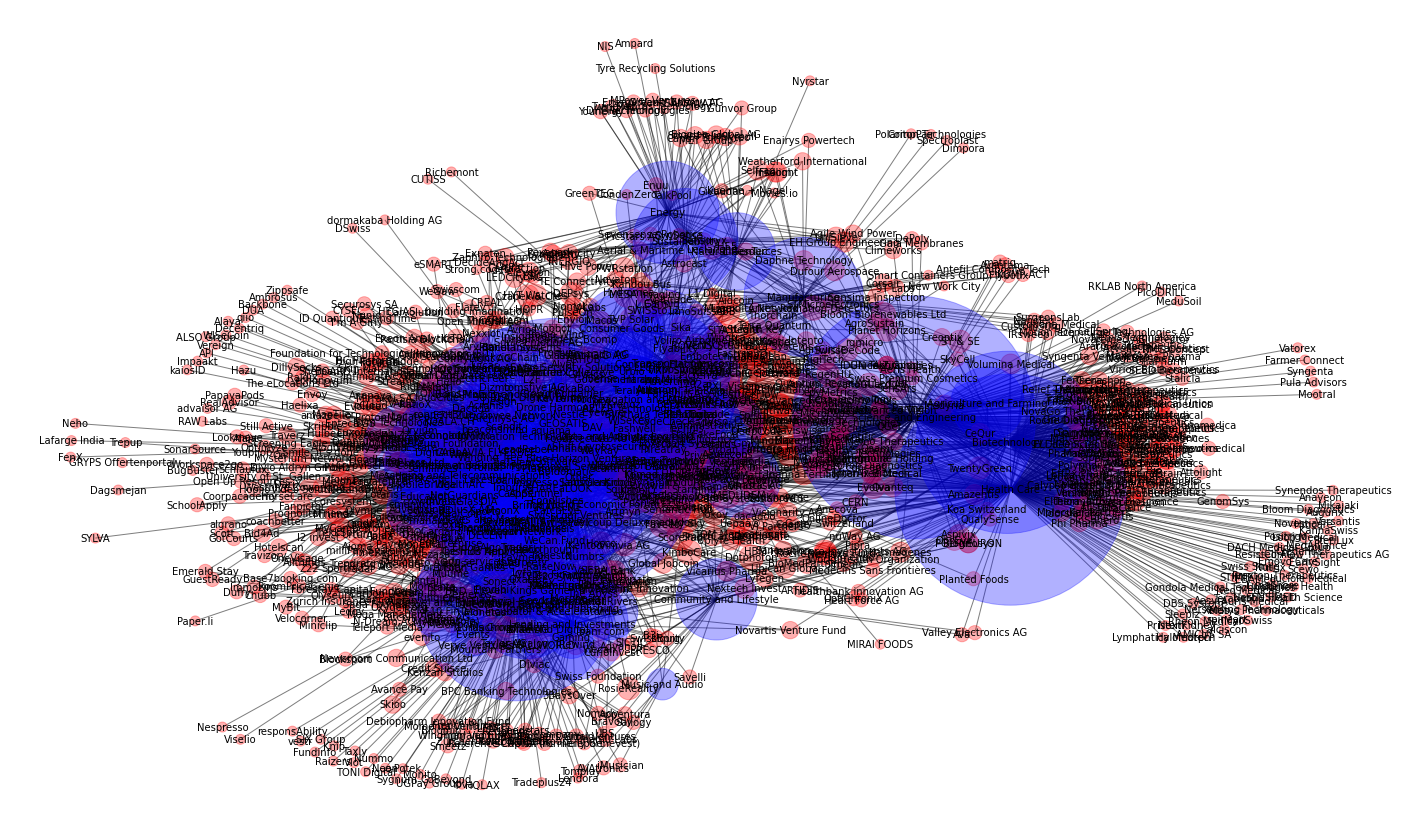

In [12]:
plot_bipartite_graph(B, small_degree=True)

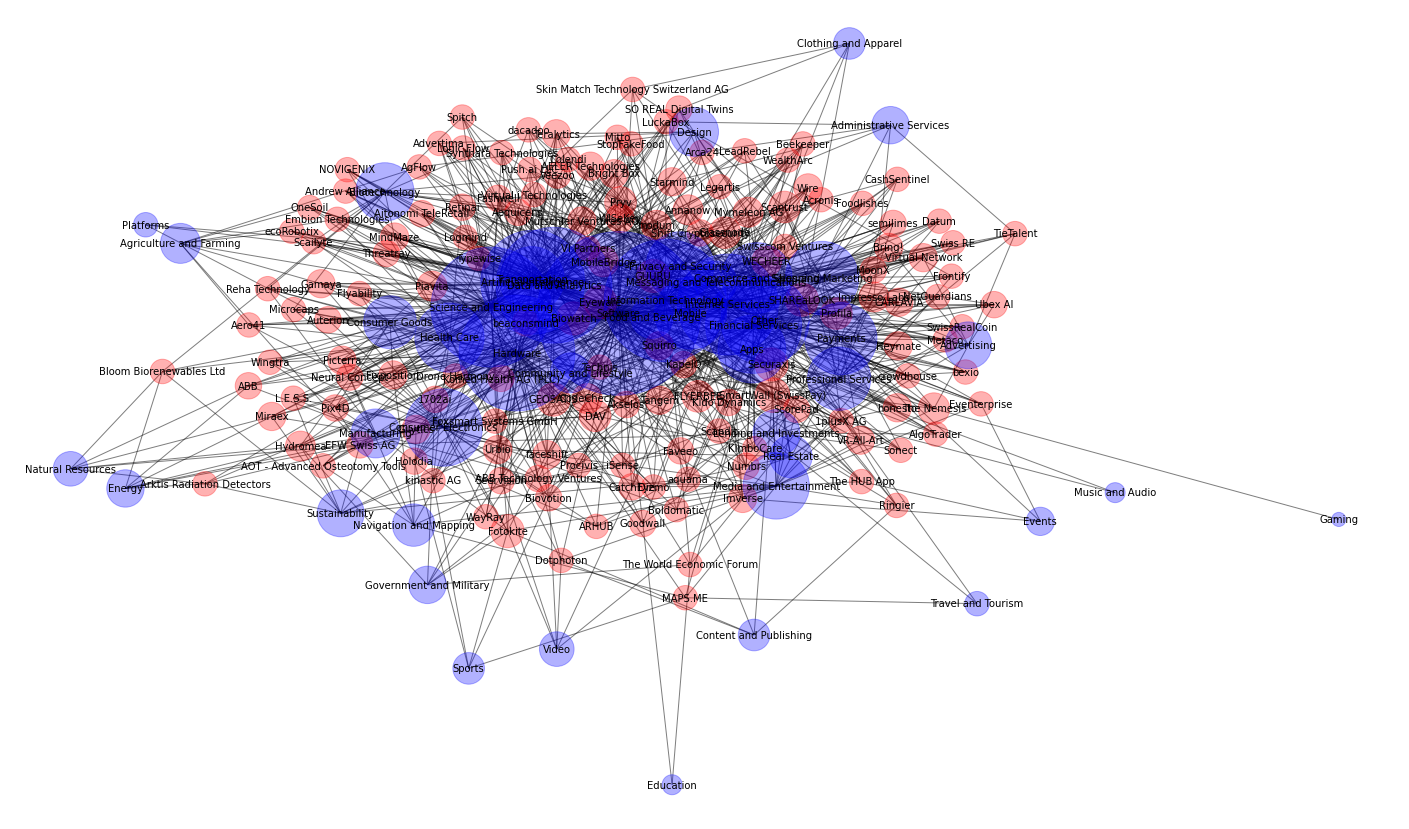

In [13]:
plot_bipartite_graph(B, small_degree=False)

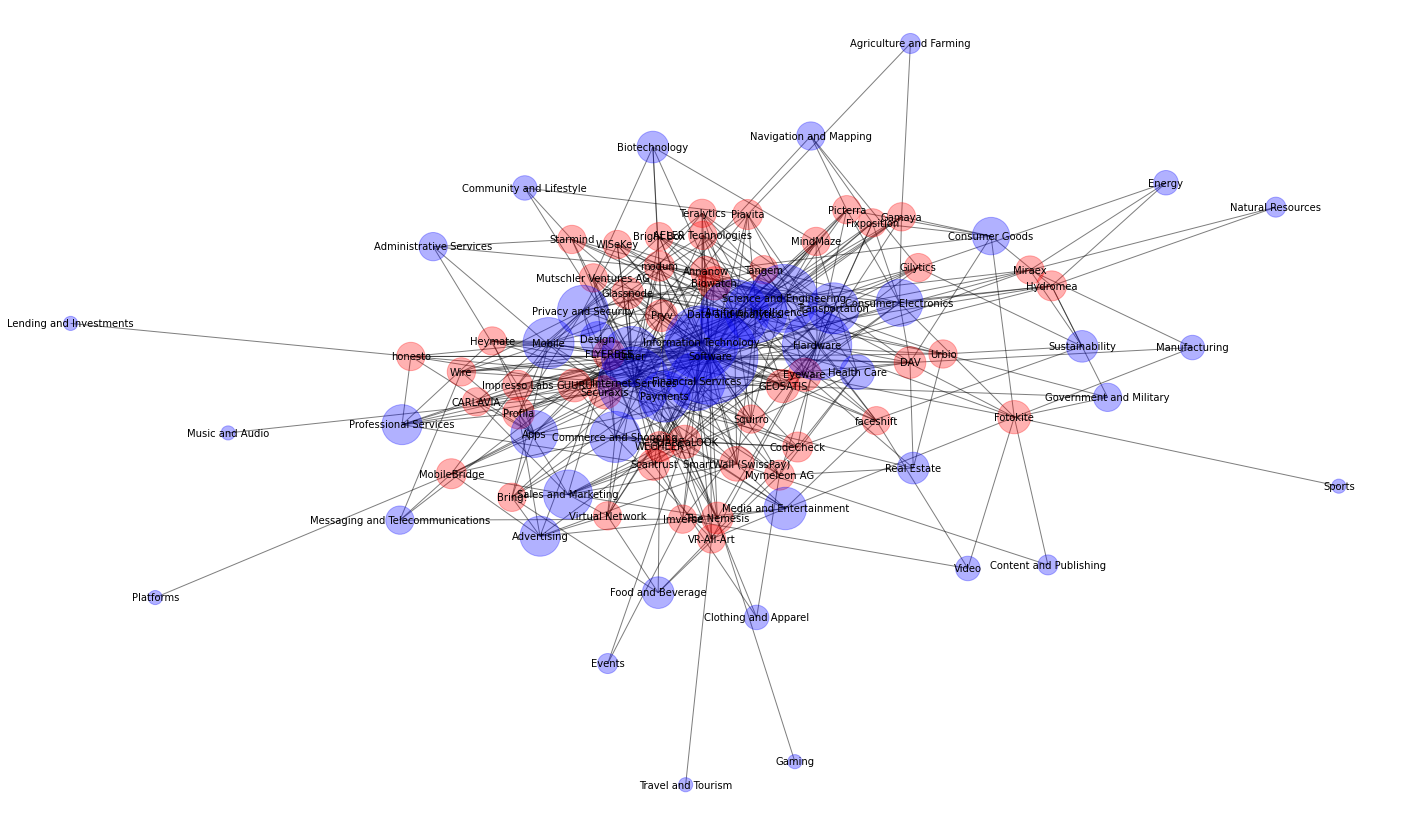

In [14]:
plot_bipartite_graph(B, small_degree=False, percentage=7)

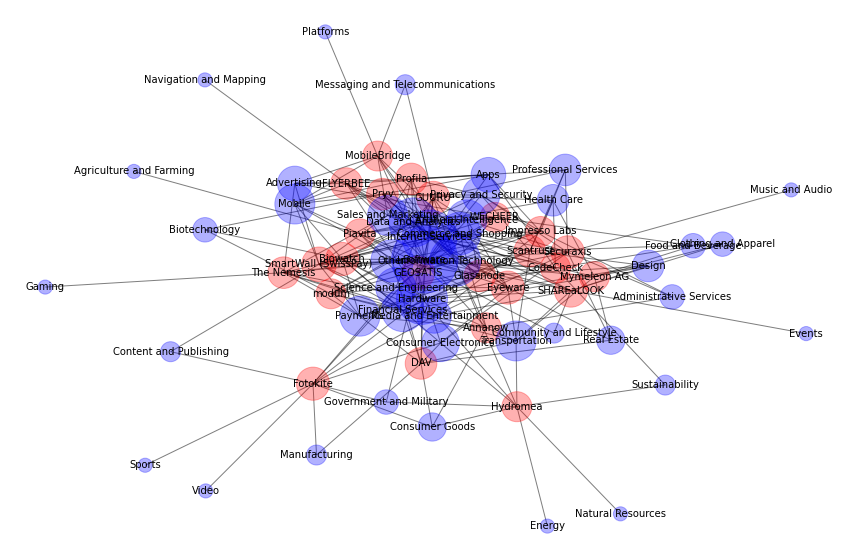

In [15]:
plot_bipartite_graph(B, small_degree=False, percentage=6)

In [16]:
[node for node in B.nodes() if B.nodes[node]['bipartite']==1]

['Apps',
 'Financial Services',
 'Information Technology',
 'Software',
 'Biotechnology',
 'Health Care',
 'Science and Engineering',
 'Mobile',
 'Payments',
 'Internet Services',
 'Messaging and Telecommunications',
 'Other',
 'Media and Entertainment',
 'Sports',
 'Hardware',
 'Privacy and Security',
 'Professional Services',
 'Data and Analytics',
 'Commerce and Shopping',
 'Navigation and Mapping',
 'Energy',
 'Manufacturing',
 'Natural Resources',
 'Transportation',
 'Artificial Intelligence',
 'Sales and Marketing',
 'Food and Beverage',
 'Sustainability',
 'Real Estate',
 'Consumer Goods',
 'Community and Lifestyle',
 'Design',
 'Agriculture and Farming',
 'Consumer Electronics',
 'Platforms',
 'Administrative Services',
 'Government and Military',
 'Advertising',
 'Clothing and Apparel',
 'Events',
 'Video',
 'Content and Publishing',
 'Gaming',
 'Music and Audio']

### Smaller Graph

In [17]:
# set number of companies

n = 20

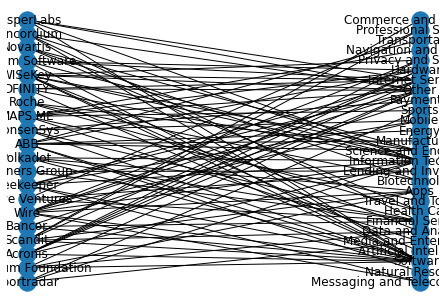

In [18]:
# create only beginning of the network to get an easy plot

# check if bipartite: bipartite.is_bipartite(B)

B_small = nx_dip_graph_from_pandas(df_graph[:n])

top = [n for n in B_small.nodes if B_small.nodes[n]['bipartite'] == 0]
pos = nx.bipartite_layout(B_small, top)
nx.draw(B_small, pos=pos, with_labels=True)
plt.show()

In [19]:
extract_nodes(B_small, 0)

{'ABB',
 'Acronis',
 'Bancor',
 'Beekeeper',
 'CasperLabs',
 'Concordium',
 'ConsenSys',
 'DFINITY',
 'Ethereum Foundation',
 'MAPS.ME',
 'Novartis',
 'Partners Group',
 'Polkadot',
 'Roche',
 'Scandit',
 'Sportradar',
 'Veeam Software',
 'Verve Ventures',
 'WISeKey',
 'Wire'}

In [20]:
extract_nodes(B_small, 1)

{'Apps',
 'Artificial Intelligence',
 'Biotechnology',
 'Commerce and Shopping',
 'Data and Analytics',
 'Energy',
 'Financial Services',
 'Hardware',
 'Health Care',
 'Information Technology',
 'Internet Services',
 'Lending and Investments',
 'Manufacturing',
 'Media and Entertainment',
 'Messaging and Telecommunications',
 'Mobile',
 'Natural Resources',
 'Navigation and Mapping',
 'Other',
 'Payments',
 'Privacy and Security',
 'Professional Services',
 'Science and Engineering',
 'Software',
 'Sports',
 'Transportation',
 'Travel and Tourism'}

In [21]:
B_small.edges()

EdgeView([('Polkadot', 'Apps'), ('Polkadot', 'Financial Services'), ('Polkadot', 'Information Technology'), ('Polkadot', 'Software'), ('Apps', 'Ethereum Foundation'), ('Apps', 'Wire'), ('Apps', 'Scandit'), ('Financial Services', 'ConsenSys'), ('Financial Services', 'Partners Group'), ('Financial Services', 'Verve Ventures'), ('Financial Services', 'Bancor'), ('Financial Services', 'Concordium'), ('Information Technology', 'Beekeeper'), ('Information Technology', 'Sportradar'), ('Information Technology', 'Acronis'), ('Information Technology', 'CasperLabs'), ('Information Technology', 'DFINITY'), ('Information Technology', 'Veeam Software'), ('Information Technology', 'Wire'), ('Information Technology', 'Concordium'), ('Information Technology', 'WISeKey'), ('Software', 'ConsenSys'), ('Software', 'Beekeeper'), ('Software', 'Acronis'), ('Software', 'CasperLabs'), ('Software', 'DFINITY'), ('Software', 'Ethereum Foundation'), ('Software', 'Veeam Software'), ('Software', 'Wire'), ('Software',

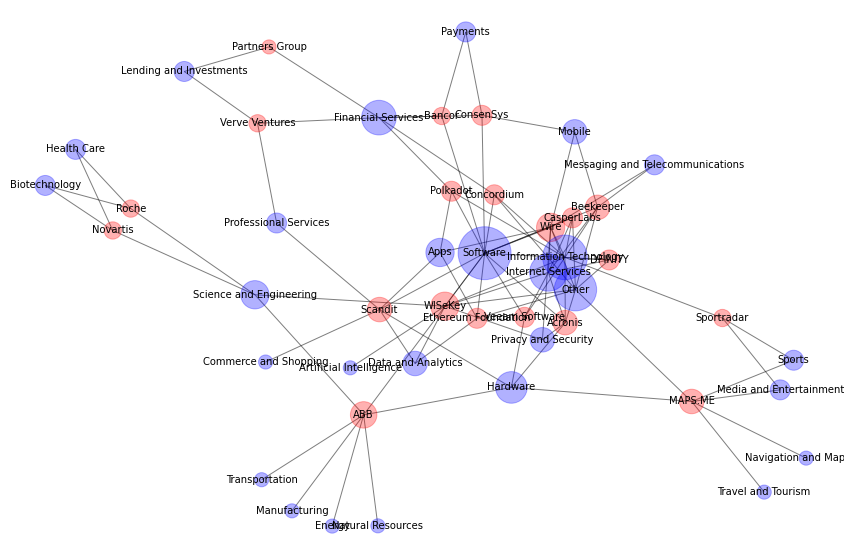

In [22]:
plot_bipartite_graph(B_small, small_degree=True)

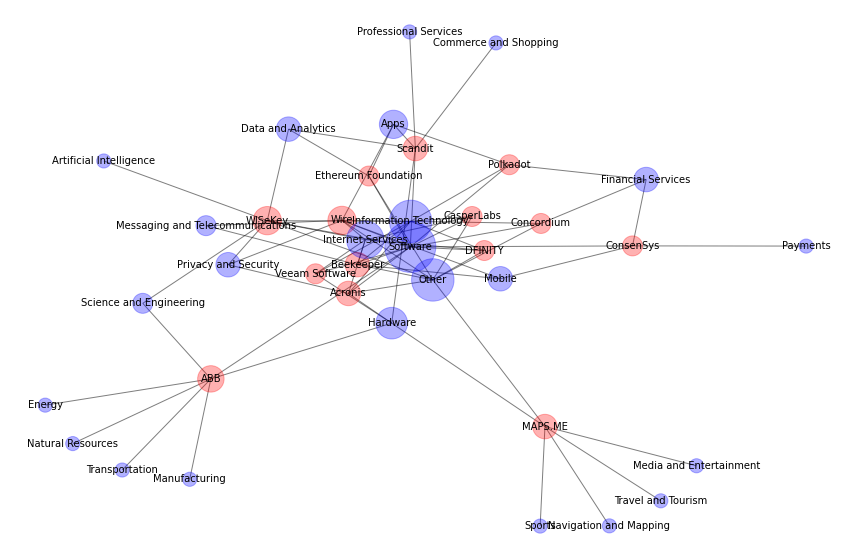

In [23]:
plot_bipartite_graph(B_small, small_degree=False)